In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
from IPython.display import display, Markdown
def display_df(df):
    display(Markdown(df.to_markdown()))

In [3]:
model = pickle.load(open('pickles/recomendaciones_compras_200_clusters.pickle', 'rb')) #To load saved model from local directory

In [4]:
infochamigo = pd.read_excel('infochamigo.xlsx')
infochamigo['ventaid'] = infochamigo['ventaid'].dropna()
infochamigo['maestroid'] = infochamigo['maestroid'].dropna()

In [5]:
compras_table = pd.read_csv('compras_table.csv', index_col='ventaid')
compras_table.head()

,CERVEZAS10,CERVEZAS100,CERVEZAS101,CERVEZAS102,CERVEZAS103,CERVEZAS104,CERVEZAS105,CERVEZAS11,CERVEZAS110,CERVEZAS111,...,GRAL9788,GRAL98,GRAL9803,GRAL9818,GRAL9847,GRAL9849,GRAL9852,GRAL99,GRAL990,GRAL9973
ventaid,,,,,,,,,,,,,,,,,,,,,
317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
339,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Predict the cluster labels: labels
labels = model.predict(compras_table)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'ventaid': compras_table.index})

# Display df sorted by cluster label
display_df(df.sort_values('labels', ascending=False).head(10))


|       |   labels |   ventaid |
|------:|---------:|----------:|
|  2260 |      199 |      3616 |
|  7245 |      199 |     23399 |
|  5257 |      199 |     18111 |
|  6503 |      199 |     21180 |
| 16039 |      199 |     51908 |
| 16041 |      199 |     51921 |
| 18502 |      199 |     59089 |
| 13205 |      199 |     43906 |
| 13189 |      199 |     43869 |
| 15540 |      199 |     50198 |

## Conteo de los cluster (grupo de recomendaciones) mas frequentes

In [7]:
display_df(df.groupby('labels').size().sort_values(ascending=False).head())

|   labels |    0 |
|---------:|-----:|
|        0 | 6287 |
|        1 |  880 |
|       14 |  807 |
|       36 |  504 |
|       11 |  475 |

## Veamos cual es el combo mas comprado

In [19]:
ventaids = df[df['labels'] == 0]['ventaid']
recomendaciones = compras_table[compras_table.index.isin(ventaids)]
items = recomendaciones.melt(var_name='items')
items = items[items['value'] > 0]
recomendaciones_counts = items['items'].value_counts(ascending=False)
display_df(recomendaciones_counts.head(10))

|            |   items |
|:-----------|--------:|
| CERVEZAS76 |      59 |
| GRAL7658   |      48 |
| GRAL5299   |      47 |
| GRAL496    |      47 |
| GRAL5980   |      41 |
| GRAL84     |      36 |
| GRAL5579   |      35 |
| GRAL8712   |      35 |
| GRAL529    |      33 |
| GRAL523    |      32 |

## Visualizemos las agrupaciones de productos con un Histograma

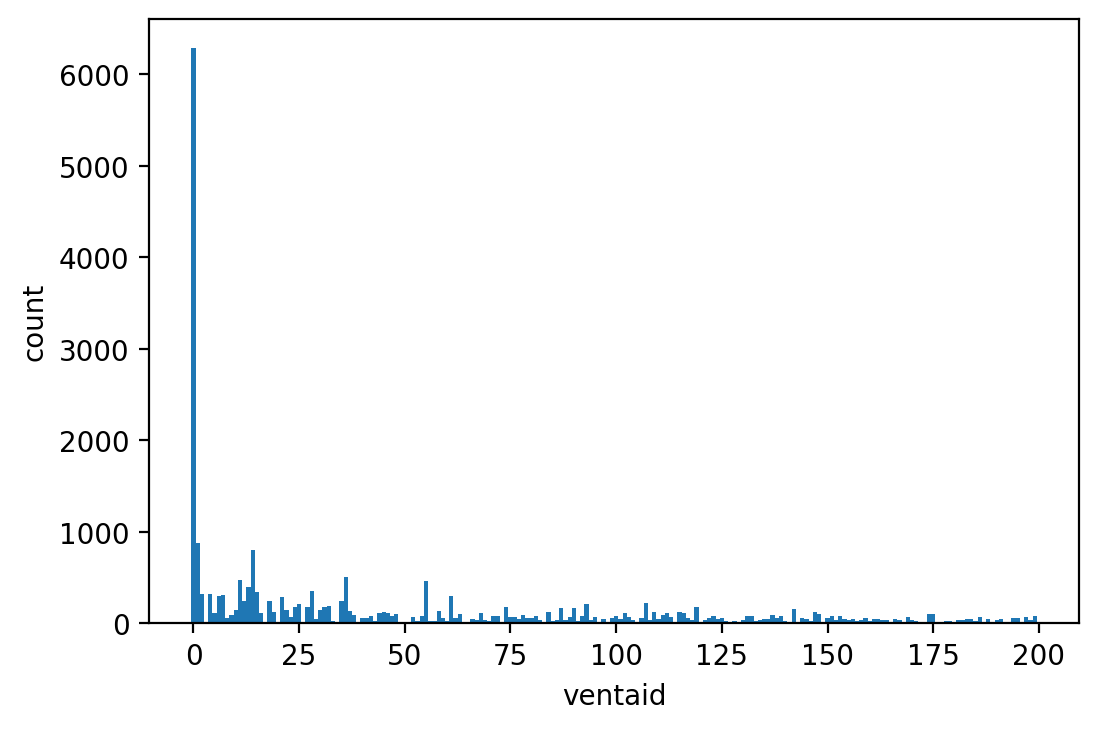

In [10]:
plt.rcParams["figure.dpi"] = 200
bins = np.arange(0, df.labels.max() + 1.5) - 0.5
plt.hist(df.labels, bins)
plt.xlabel('ventaid')
plt.ylabel('count')
plt.show()

### Creamos un dataframe con todos los items disponibles

In [11]:
items = compras_table.columns.values
items_series = compras_table.columns
items_df = pd.DataFrame({'items': items})
display_df(items_df.head())

|    | items       |
|---:|:------------|
|  0 | CERVEZAS10  |
|  1 | CERVEZAS100 |
|  2 | CERVEZAS101 |
|  3 | CERVEZAS102 |
|  4 | CERVEZAS103 |

## Realizamos el lookup del 'item_busqueda' y visualizamos las recomendaciones

In [12]:
item_busqueda = 'GRAL479'
input_row = np.array([items_series == item_busqueda])
input_df = pd.DataFrame(data=input_row, columns=items)
display(input_df)
label = model.predict(input_df)[0]

,CERVEZAS10,CERVEZAS100,CERVEZAS101,CERVEZAS102,CERVEZAS103,CERVEZAS104,CERVEZAS105,CERVEZAS11,CERVEZAS110,CERVEZAS111,...,GRAL9788,GRAL98,GRAL9803,GRAL9818,GRAL9847,GRAL9849,GRAL9852,GRAL99,GRAL990,GRAL9973
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
ventaids = df[df['labels'] == label]['ventaid']
recomendaciones = compras_table[compras_table.index.isin(ventaids)]
items = recomendaciones.melt(var_name='items')
items = items[items['value'] > 0]
recomendaciones_counts = items['items'].value_counts(ascending=False)
len(recomendaciones_counts)


61

In [18]:
display_df(recomendaciones_counts)

|              |   items |
|:-------------|--------:|
| GRAL479      |      63 |
| GRAL3731     |       9 |
| CERVEZAS56   |       8 |
| CERVEZAS228  |       4 |
| CERVEZAS8427 |       4 |
| GRAL10844    |       3 |
| GRAL117      |       2 |
| GRAL73       |       2 |
| GRAL449      |       2 |
| GRAL3732     |       2 |
| GRAL4812     |       2 |
| GRAL76       |       1 |
| GRAL8707     |       1 |
| GRAL4870     |       1 |
| GRAL489      |       1 |
| GRAL4982     |       1 |
| GRAL500      |       1 |
| GRAL501      |       1 |
| GRAL502      |       1 |
| GRAL9075     |       1 |
| GRAL512      |       1 |
| GRAL529      |       1 |
| GRAL8685     |       1 |
| GRAL8185     |       1 |
| GRAL533      |       1 |
| GRAL5965     |       1 |
| GRAL6013     |       1 |
| GRAL6026     |       1 |
| GRAL8208     |       1 |
| GRAL6344     |       1 |
| GRAL6537     |       1 |
| GRAL6694     |       1 |
| GRAL6722     |       1 |
| CERVEZAS156  |       1 |
| GRAL4583     |       1 |
| GRAL478      |       1 |
| GRAL4724     |       1 |
| CERVEZAS190  |       1 |
| CERVEZAS192  |       1 |
| CERVEZAS231  |       1 |
| CERVEZAS249  |       1 |
| CERVEZAS278  |       1 |
| CERVEZAS90   |       1 |
| GRAL10216    |       1 |
| GRAL10874    |       1 |
| GRAL11171    |       1 |
| GRAL11406    |       1 |
| GRAL11472    |       1 |
| GRAL12220    |       1 |
| GRAL126      |       1 |
| GRAL131      |       1 |
| GRAL3703     |       1 |
| GRAL4439     |       1 |
| GRAL445      |       1 |
| GRAL4561     |       1 |
| GRAL457      |       1 |
| GRAL458      |       1 |
| CERVEZAS170  |       1 |
| GRAL4621     |       1 |
| GRAL472      |       1 |
| GRAL9565     |       1 |

## GRAL479 -> FANTA NARANJA
## GRAL3731 -> UVITA
## CERVEZAS56 -> PILSEN
## GRAL117 -> PALERMO
